**Sailco Production Planning Problem**

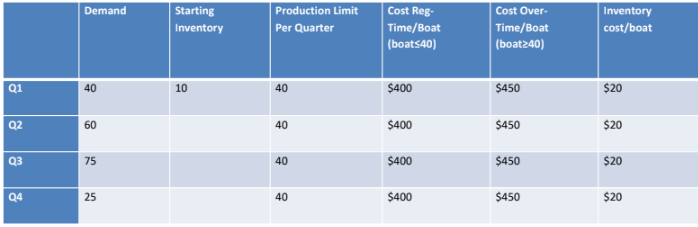
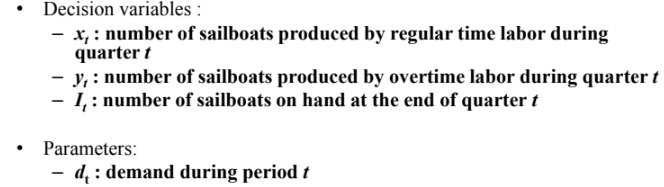

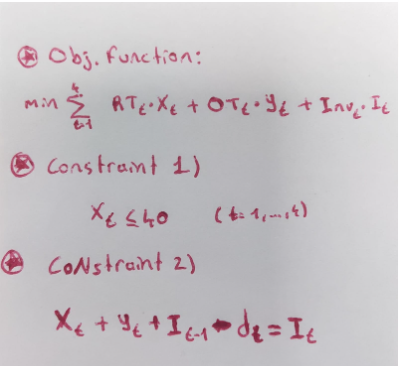

In [135]:
import gurobipy as gp
from gurobipy import GRB
from gurobipy import quicksum

In [136]:
mdl = gp.Model('Production Planning')

In [137]:
#Beginning inventory
b = 10
demand = [40,60,75,25]

q = [i+1 for i in range(4)]
RT = [400 for i in range(4)]
OT = [450 for i in range(4)]
Inv = [20 for i in range(4)]

In [138]:
quarters,Reg_Time,Over_Time,Inventory,d = (
gp.multidict({q[i]:[RT[i],OT[i],Inv[i],demand[i]] for i in range(len(q))}))

*Variables*

In [139]:
x = mdl.addVars(quarters, vtype=GRB.INTEGER, name='X')
y = mdl.addVars(quarters, vtype=GRB.INTEGER, name='Y')
I = mdl.addVars(quarters, vtype=GRB.INTEGER, name='I')

*Objective Function*

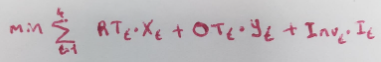

In [140]:
mdl.setObjective(quicksum(Reg_Time[i]*x[i] + Over_Time[i]*y[i] + Inventory[i]*I[i] for i in range(1,5)))

*Constraints*

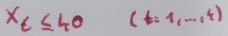

In [141]:
mdl.addConstrs(x[i] <= 40 for i in range(1,5))

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

In [142]:
I[0] = 10

Inventory balance equation

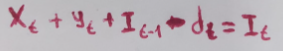

In [143]:
mdl.addConstrs((x[i] + y[i] + I[i-1] - d[i]) == I[i] for i in range(1,5))

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

In [144]:
mdl.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: Intel(R) Core(TM) i3-10100F CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 12 columns and 19 nonzeros
Model fingerprint: 0x9d409e5e
Variable types: 0 continuous, 12 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 5e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 8e+01]
Found heuristic solution: objective 85500.000000
Presolve removed 4 rows and 0 columns
Presolve time: 0.00s
Presolved: 4 rows, 12 columns, 15 nonzeros
Variable types: 0 continuous, 12 integer (0 binary)
Found heuristic solution: objective 85300.000000

Root relaxation: objective 7.845000e+04, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumb

In [145]:
for i in mdl.getVars():
  if i.x > 0:
    print(i.VarName, i.x)

X[1] 40.0
X[2] 40.0
X[3] 40.0
X[4] 25.0
Y[2] 10.0
Y[3] 35.0
I[1] 10.0
